In [1]:
import sklearn as skl
import sklearn.preprocessing as skprep
import sklearn.pipeline as skpipe
import sklearn.linear_model as sklin
import sklearn.model_selection as skms
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Used my own github repo for file import
df=pd.read_csv("https://raw.githubusercontent.com/croctopus/First_repo/main/auto-mpg.csv?token=GHSAT0AAAAAABZPF3KOHKBDJGZLIS55OCB2YZ25TWA")
df.head()

In [ ]:
x=df.shape   #2
print("Number of rows,columns = ",x)

Number of rows,columns =  (398, 9)


In [ ]:
print(df["car name"])         #3
y=df["car name"]
n_row=y.shape[0]
print("Number of rows = %s" %n_row)

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    vw pickup
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: car name, Length: 398, dtype: object
Number of rows = 398


In [ ]:
df[df["car name"]=="amc concord dl"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
dfn=df.replace(to_replace="?", value=np.nan)

In [ ]:
dfn[dfn["car name"]=="amc concord dl"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [ ]:
dfn[dfn.isna().any(axis=1)]     #4

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [ ]:
print("Horsepower median=",dfn['horsepower'].median())
dfn.median()

Horsepower median= 93.5


In [ ]:
df_new=dfn.fillna(value=dfn['horsepower'].median())      #5
df_new.iloc[330]

mpg                             40.9
cylinders                          4
displacement                    85.0
horsepower                      93.5
weight                          1835
acceleration                    17.3
model year                        80
origin                             2
car name        renault lecar deluxe
Name: 330, dtype: object

In [ ]:
enc=skprep.OneHotEncoder()
enc.fit_transform(df[["cylinders",'origin']]).toarray()    #6

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [ ]:
train_set, test_set=skms.train_test_split(df_new, test_size=0.2, random_state=5)

In [ ]:
train_set.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
248,36.1,4,91.0,60,1800,16.4,78,3,honda civic cvcc
42,12.0,8,383.0,180,4955,11.5,71,1,dodge monaco (sw)
238,33.5,4,98.0,83,2075,15.9,77,1,dodge colt m/m
127,19.0,6,232.0,100,2901,16.0,74,1,amc hornet
56,26.0,4,91.0,70,1955,20.5,71,1,plymouth cricket


In [ ]:
y_train= train_set.loc[:,'mpg']
y_train=y_train.reset_index(drop=False)
y_train=y_train.drop(columns='index')
y_train.head()

,mpg
0,36.1
1,12.0
2,33.5
3,19.0
4,26.0


In [ ]:
y_test= test_set.loc[:,'mpg']
y_test=y_test.reset_index(drop=False)
y_test=y_test.drop(columns='index')
y_test.head()

,mpg
0,25.8
1,44.3
2,29.0
3,28.0
4,17.6


In [ ]:
x_train=train_set.drop(columns=['mpg','car name'])
x_train=x_train.reset_index(drop=False)
x_train=x_train.drop(columns='index')
x_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,4,91.0,60,1800,16.4,78,3
1,8,383.0,180,4955,11.5,71,1
2,4,98.0,83,2075,15.9,77,1
3,6,232.0,100,2901,16.0,74,1
4,4,91.0,70,1955,20.5,71,1


In [ ]:
x_test=test_set.drop(columns=['mpg','car name'])
x_test=x_test.reset_index(drop=False)
x_test=x_test.drop(columns='index')
x_test.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,4,156.0,92,2620,14.4,81,1
1,4,90.0,48,2085,21.7,80,2
2,4,68.0,49,1867,19.5,73,2
3,4,116.0,90,2123,14.0,71,2
4,8,302.0,129,3725,13.4,79,1


In [ ]:
pipe=skpipe.Pipeline([("scale",skprep.StandardScaler()),
                      ("model",sklin.LinearRegression())])

In [ ]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

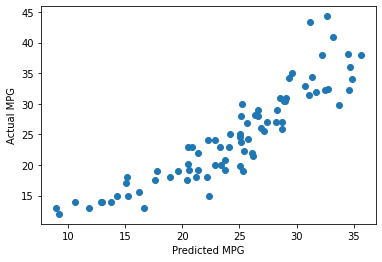

In [ ]:
new_pred=pipe.predict(x_test)    #8
plt.scatter(new_pred,y_test)
plt.xlabel("Predicted MPG")
plt.ylabel("Actual MPG")
plt.show()

In [ ]:
import sklearn.metrics as skmet

new_pred 
lin_mse = skmet.mean_squared_error(y_test, new_pred)
lin_rmse = np.sqrt(lin_mse)
print("training error RMSE ",lin_rmse)
lin_mae = skmet.mean_absolute_error(y_test, new_pred)
print("training error MAE ",lin_mae)

training error RMSE  3.37566301371532
training error MAE  2.484230169488972
